Modified from

https://www.tensorflow.org/probability/examples/Structural_Time_Series_Modeling_Case_Studies_Atmospheric_CO2_and_Electricity_Demand

Details in this blog post: https://blog.tensorflow.org/2019/03/structural-time-series-modeling-in.html

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import jax.numpy as jnp
import jax.random as jr

import sts_jax.structural_time_series.sts_model as sts

### Read the CO2 data set

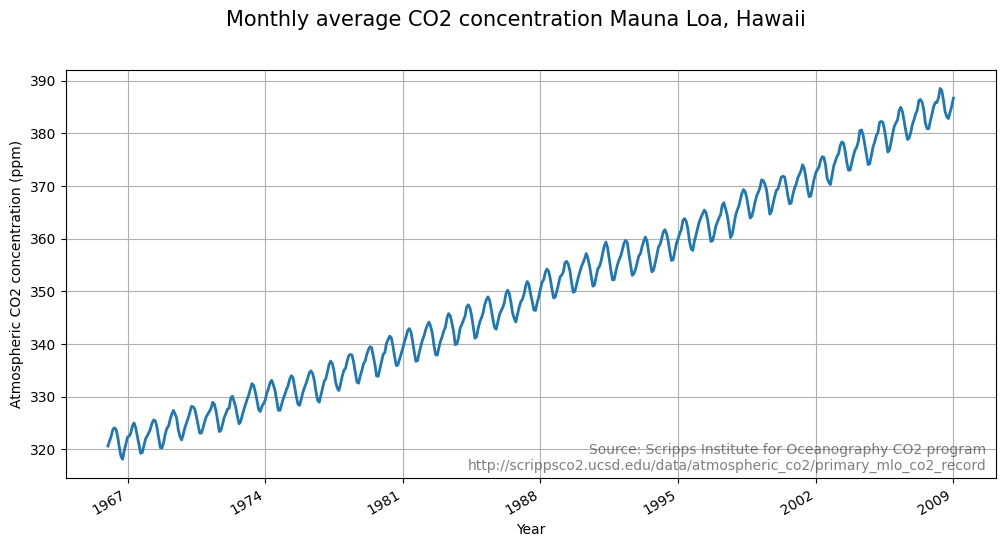

In [3]:
# CO2 readings from Mauna Loa observatory, monthly beginning January 1966
# Original source: http://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record
co2_by_month = np.array(
    "320.62,321.60,322.39,323.70,324.08,323.75,322.38,320.36,318.64,318.10,319.78,321.03,322.33,322.50,323.04,324.42,325.00,324.09,322.54,320.92,319.25,319.39,320.73,321.96,322.57,323.15,323.89,325.02,325.57,325.36,324.14,322.11,320.33,320.25,321.32,322.89,324.00,324.42,325.63,326.66,327.38,326.71,325.88,323.66,322.38,321.78,322.85,324.12,325.06,325.98,326.93,328.14,328.08,327.67,326.34,324.69,323.10,323.06,324.01,325.13,326.17,326.68,327.17,327.79,328.92,328.57,327.36,325.43,323.36,323.56,324.80,326.01,326.77,327.63,327.75,329.73,330.07,329.09,328.04,326.32,324.84,325.20,326.50,327.55,328.55,329.56,330.30,331.50,332.48,332.07,330.87,329.31,327.51,327.18,328.16,328.64,329.35,330.71,331.48,332.65,333.09,332.25,331.18,329.39,327.43,327.37,328.46,329.57,330.40,331.40,332.04,333.31,333.97,333.60,331.90,330.06,328.56,328.34,329.49,330.76,331.75,332.56,333.50,334.58,334.88,334.33,333.05,330.94,329.30,328.94,330.31,331.68,332.93,333.42,334.70,336.07,336.75,336.27,334.92,332.75,331.59,331.16,332.40,333.85,334.97,335.38,336.64,337.76,338.01,337.89,336.54,334.68,332.76,332.55,333.92,334.95,336.23,336.76,337.96,338.88,339.47,339.29,337.73,336.09,333.92,333.86,335.29,336.73,338.01,338.36,340.07,340.77,341.47,341.17,339.56,337.60,335.88,336.02,337.10,338.21,339.24,340.48,341.38,342.51,342.91,342.25,340.49,338.43,336.69,336.86,338.36,339.61,340.75,341.61,342.70,343.57,344.14,343.35,342.06,339.81,337.98,337.86,339.26,340.49,341.38,342.52,343.10,344.94,345.76,345.32,343.98,342.38,339.87,339.99,341.15,342.99,343.70,344.50,345.28,347.06,347.43,346.80,345.39,343.28,341.07,341.35,342.98,344.22,344.97,345.99,347.42,348.35,348.93,348.25,346.56,344.67,343.09,342.80,344.24,345.56,346.30,346.95,347.85,349.55,350.21,349.55,347.94,345.90,344.85,344.17,345.66,346.90,348.02,348.48,349.42,350.99,351.85,351.26,349.51,348.10,346.45,346.36,347.81,348.96,350.43,351.73,352.22,353.59,354.22,353.79,352.38,350.43,348.73,348.88,350.07,351.34,352.76,353.07,353.68,355.42,355.67,355.12,353.90,351.67,349.80,349.99,351.30,352.52,353.66,354.70,355.38,356.20,357.16,356.23,354.81,352.91,350.96,351.18,352.83,354.21,354.72,355.75,357.16,358.60,359.34,358.24,356.17,354.02,352.15,352.21,353.75,354.99,355.99,356.72,357.81,359.15,359.66,359.25,357.02,355.00,353.01,353.31,354.16,355.40,356.70,357.17,358.38,359.46,360.28,359.60,357.57,355.52,353.69,353.99,355.34,356.80,358.37,358.91,359.97,361.26,361.69,360.94,359.55,357.48,355.84,356.00,357.58,359.04,359.97,361.00,361.64,363.45,363.80,363.26,361.89,359.45,358.05,357.75,359.56,360.70,362.05,363.24,364.02,364.71,365.41,364.97,363.65,361.48,359.45,359.61,360.76,362.33,363.18,363.99,364.56,366.36,366.80,365.63,364.47,362.50,360.19,360.78,362.43,364.28,365.33,366.15,367.31,368.61,369.30,368.88,367.64,365.78,363.90,364.23,365.46,366.97,368.15,368.87,369.59,371.14,371.00,370.35,369.27,366.93,364.64,365.13,366.68,368.00,369.14,369.46,370.51,371.66,371.83,371.69,370.12,368.12,366.62,366.73,368.29,369.53,370.28,371.50,372.12,372.86,374.02,373.31,371.62,369.55,367.96,368.09,369.68,371.24,372.44,373.08,373.52,374.85,375.55,375.40,374.02,371.48,370.70,370.25,372.08,373.78,374.68,375.62,376.11,377.65,378.35,378.13,376.61,374.48,372.98,373.00,374.35,375.69,376.79,377.36,378.39,380.50,380.62,379.55,377.76,375.83,374.05,374.22,375.84,377.44,378.34,379.61,380.08,382.05,382.24,382.08,380.67,378.67,376.42,376.80,378.31,379.96,381.37,382.02,382.56,384.37,384.92,384.03,382.28,380.48,378.81,379.06,380.14,381.66,382.58,383.71,384.34,386.23,386.41,385.87,384.45,381.84,380.86,380.86,382.36,383.61,385.07,385.84,385.83,386.77,388.51,388.05,386.25,384.08,383.09,382.78,384.01,385.11,386.65,387.12,388.52,389.57,390.16,389.62,388.07,386.08,384.65,384.33,386.05,387.49,388.55,390.07,391.01,392.38,393.22,392.24,390.33,388.52,386.84,387.16,388.67,389.81,391.30,391.92,392.45,393.37,394.28,393.69,392.59,390.21,389.00,388.93,390.24,391.80,393.07,393.35,394.36,396.43,396.87,395.88,394.52,392.54,391.13,391.01,392.95,394.34,395.61,396.85,397.26,398.35,399.98,398.87,397.37,395.41,393.39,393.70,395.19,396.82,397.92,398.10,399.47,401.33,401.88,401.31,399.07,397.21,395.40,395.65,397.23,398.79,399.85,400.31,401.51,403.45,404.10,402.88,401.61,399.00,397.50,398.28,400.24,401.89,402.65,404.16,404.85,407.57,407.66,407.00,404.50,402.24,401.01,401.50,403.64,404.55,406.07,406.64,407.06,408.95,409.91,409.12,407.20,405.24,403.27,403.64,405.17,406.75,408.05,408.34,409.25,410.30,411.30,410.88,408.90,407.10,405.59,405.99,408.12,409.23,410.92".split(",")
).astype(np.float32)
co2_by_month = jnp.array(co2_by_month[:, None])

num_forecast_steps = 12 * 10  # Forecast the final ten years, given previous data
co2_by_month_training_data = co2_by_month[:-num_forecast_steps]

# Plot the original data
co2_dates = np.arange("1966-01", "2019-02", dtype="datetime64[M]")
co2_loc = mdates.YearLocator(7)
co2_fmt = mdates.DateFormatter("%Y")
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(co2_dates[:-num_forecast_steps], co2_by_month_training_data, lw=2, label='training data', markersize=1)
ax.grid()
ax.xaxis.set_major_locator(co2_loc)
ax.xaxis.set_major_formatter(co2_fmt)
ax.set_ylabel("Atmospheric CO2 concentration (ppm)")
ax.set_xlabel("Year")

fig.suptitle("Monthly average CO2 concentration Mauna Loa, Hawaii", fontsize=15)
ax.text(
    0.99,
    0.02,
    "Source: Scripps Institute for Oceanography CO2 program\nhttp://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record",
    transform=ax.transAxes,
    horizontalalignment='right',
    alpha=0.5
)
fig.autofmt_xdate()

### Plot functions

In [4]:
def plot_forecast(model, param_samples, obs_time_series):
    # Forecast
    forecasts = model.forecast(param_samples, obs_time_series, num_forecast_steps)
    forecasts = jnp.concatenate(forecasts, axis=0).squeeze()
    forecast_means = forecasts.mean(axis=0)
    forecast_scales = jnp.std(forecasts, axis=0)

    # Plot the forecast
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(co2_dates, co2_by_month, lw=2, label='Observation', color='C0')
    ax.plot(co2_dates[-num_forecast_steps:], forecast_means, lw='2', color='C1', label='Forecast')
    ax.fill_between(co2_dates[-num_forecast_steps:], 
                    forecast_means - 2*forecast_scales, forecast_means + 2*forecast_scales,
                    color='C1', alpha=0.3)
    ax.set_ylabel("Atmospheric CO2 concentration (ppm)")
    ax.set_xlabel("Year")
    ax.legend(loc='upper left')
    ax.grid()
    fig.suptitle("Monthly average CO2 concentration Mauna Loa, Hawaii", fontsize=15)

def plot_decompose(model, param_samples):
    # Decompose the fitted model into STS components
    component_posterior_dict = model.decompose_by_component(param_samples, co2_by_month)

    # Plot the posterior of each component
    num_components = len(component_posterior_dict)
    fig = plt.figure(figsize=(12, 4 * num_components))
    for i, (component_name, component_posterior) in enumerate(component_posterior_dict.items()):
        component_mean = jnp.squeeze(component_posterior['pos_mean'])
        component_std = jnp.squeeze(jnp.sqrt(component_posterior['pos_cov']))

        ax = fig.add_subplot(num_components, 1,1+i)
        ax.plot(co2_dates, component_mean, lw=2, color='C0')
        ax.fill_between(co2_dates, component_mean-2.*component_std, component_mean+2.*component_std, alpha=0.5, color='C1')
        ax.set_title(component_name)

### Build STS models

In [5]:
# The model includes the local linear trend component and the seasonal component
trend = sts.LocalLinearTrend()
seasonal_dummy = sts.SeasonalDummy(num_seasons=12)
seasonal_trig = sts.SeasonalTrig(num_seasons=12)

# The model with the dummy seasonal component
model_dummy_season = sts.StructuralTimeSeries([trend, seasonal_dummy], 
                                              obs_distribution='Gaussian',
                                              obs_time_series=co2_by_month_training_data)

# The model with the trigonometric seasonal component
model_trig_season = sts.StructuralTimeSeries([trend, seasonal_trig], 
                                             obs_distribution='Gaussian',
                                             obs_time_series=co2_by_month_training_data)

### Model Learning via HMC initialized by MLE

In [6]:
obs_time_series = co2_by_month_training_data
key = jr.PRNGKey(0)
sample_size = 200

Fit the model with dummy seasonal component.

Running window adaptation


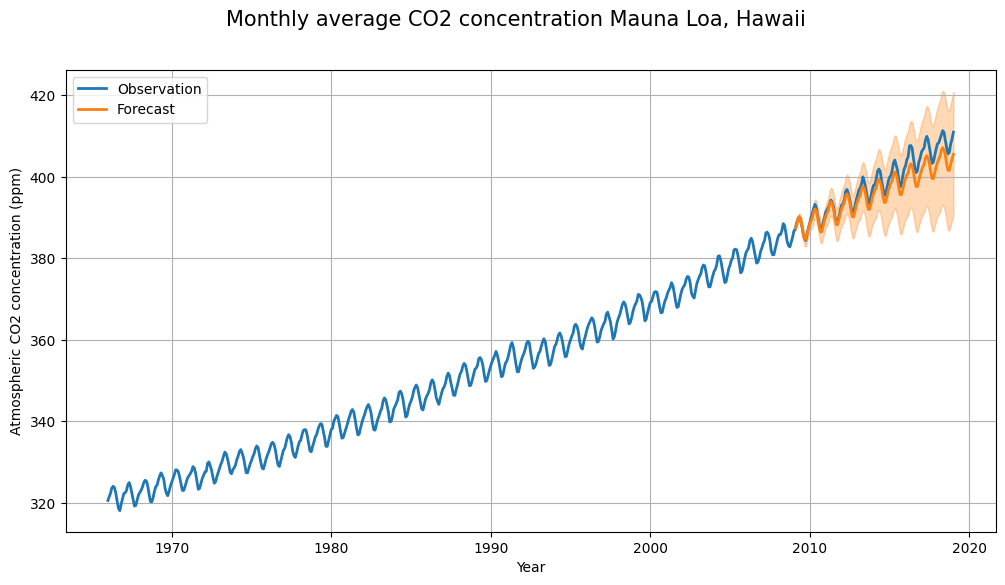

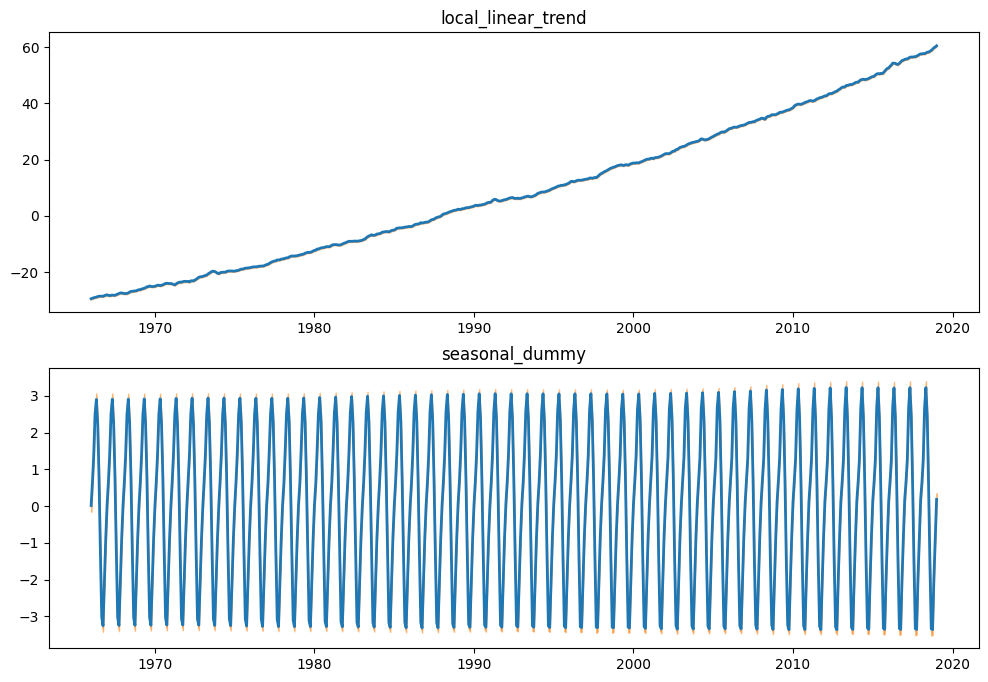

In [10]:
# Fit the model with MLE esitmator
opt_param_dummy, _losses = model_dummy_season.fit_mle(obs_time_series, key=key)

# Fit with HMC (NUTS), initialized by MLE estimation.
param_dummy_samples, _log_probs = model_dummy_season.fit_hmc(
    num_samples=100, obs_time_series=obs_time_series, initial_params=opt_param_dummy)

# Plot the forecast
plot_forecast(model_dummy_season, param_dummy_samples, obs_time_series)

# Plot the decomposition
plot_decompose(model_dummy_season, param_dummy_samples)

Fit the model with trigonometric seasonal component.

Running window adaptation


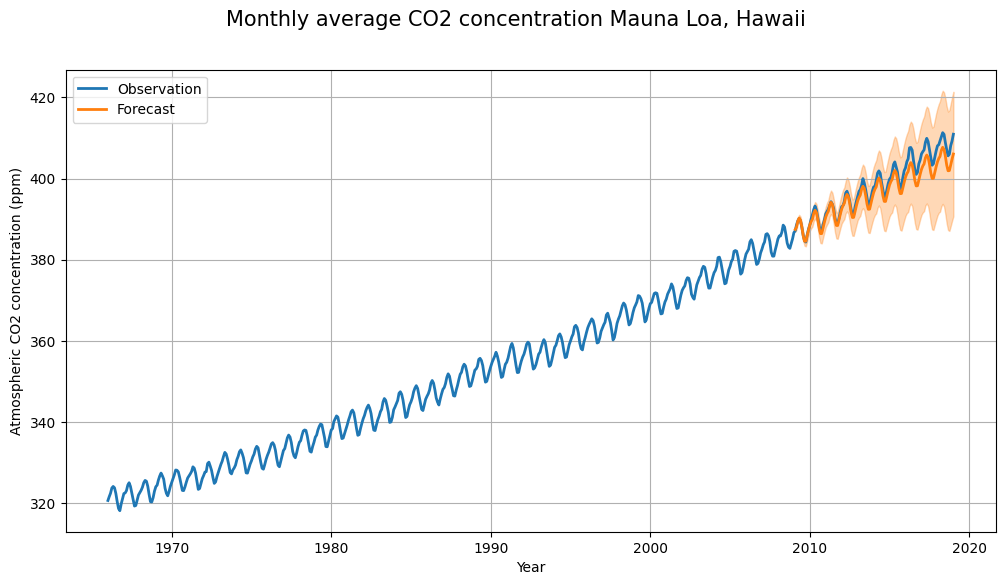

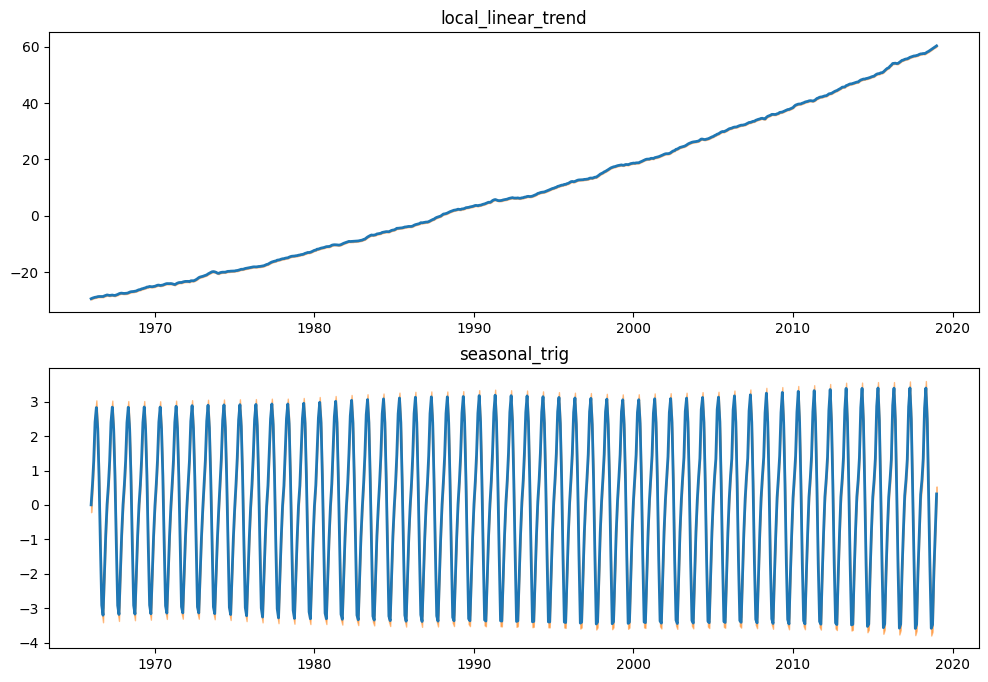

In [11]:
# Find the MLE estimate.
opt_param_trig, _losses = model_trig_season.fit_mle(obs_time_series, key=key)

# Fit with HMC (NUTS), initialized by MLE estimation.
param_trig_samples, _log_probs = model_trig_season.fit_hmc(
    num_samples=100, obs_time_series=obs_time_series, initial_params=opt_param_trig)

# Plot the forecast
plot_forecast(model_trig_season, param_trig_samples, obs_time_series)

# Plot the decomposition
plot_decompose(model_trig_season, param_trig_samples)